## Количество различных слов в названиях функций

Пути всех vocab-ов с таргетами (названиями функций и частотой их встречаемости):

In [1]:
from collections import Counter

In [2]:
TRAIN_VOCAB_PATH = "../dataset/java-small/java-small.train.functions.vocab"
TEST_VOCAB_PATH = "../dataset/java-small/java-small.test.functions.vocab"
VALIDATION_VOCAB_PATH = "../dataset/java-small/java-small.validation.functions.vocab"

Загрузим все vocab-ы в pandas-таблицы:

In [3]:
import pandas as pd

train_df = pd.read_csv(TRAIN_VOCAB_PATH, sep=' ', names=["Function", "Frequency"])
test_df = pd.read_csv(TEST_VOCAB_PATH, sep=' ', names=["Function", "Frequency"])
validation_df = pd.read_csv(VALIDATION_VOCAB_PATH, sep=' ', names=["Function", "Frequency"])

display(train_df.sort_values(by="Function"))
display(test_df.sort_values(by="Function"))
display(validation_df.sort_values(by="Function"))

,Function,Frequency
240,a,3
9924,aabpp,1
29200,abandon,1
3654,abbrev|for,1
23937,abort,15
...,...,...
33645,zero|content|length,1
9725,zero|counter,1
27142,zero|out|factory|count,1
23947,zone|id,1


,Function,Frequency
103,$,5
284,_,67
287,a,162
13903,abandon|block,4
10265,abbr,127
...,...,...
15682,x|attrs|to|json,1
15327,x|attr|names|to|json,1
11561,yield,1
18870,zip|dir,1


,Function,Frequency
94,aabb|expand,1
2039,aabb|overlap,1
540,aabb|test,1
5582,able|to|draw,1
5987,abs,5
...,...,...
105,y,1
7083,y|slider|moved,4
107,z,1
2069,zero,1


Сгруппируем по дубликатам и просуммируем:

In [4]:
conc = pd.concat([train_df, test_df, validation_df], ignore_index=True)
conc = conc.groupby('Function').sum().reset_index()

display(conc)

,Function,Frequency
0,$,5
1,_,67
2,a,165
3,aabb|expand,1
4,aabb|overlap,1
...,...,...
68387,zip|dir,1
68388,zk|do|with|retries,1
68389,zone|id,1
68390,zone|id|from|resolver,1


Сохраним получившиеся данные:

In [5]:
CONCATENATED_DF_PATH = "../dataset/java-small/java-small.dataset.functions.vocab"

conc.to_csv(CONCATENATED_DF_PATH, index=False)

### Распределение слов в названиях функций c учетом частоты встречаемости

In [6]:
freqs = conc['Frequency']
words = conc['Function'].apply(lambda x: str.split(x, '|'))

display(words, freqs)

0                               [$]
1                               [_]
2                               [a]
3                    [aabb, expand]
4                   [aabb, overlap]
                    ...            
68387                    [zip, dir]
68388       [zk, do, with, retries]
68389                    [zone, id]
68390    [zone, id, from, resolver]
68391                        [zoom]
Name: Function, Length: 68392, dtype: object

0          5
1         67
2        165
3          1
4          1
        ... 
68387      1
68388      1
68389      1
68390      1
68391      9
Name: Frequency, Length: 68392, dtype: int64

In [7]:
cnt = Counter()
for seq, freq in zip(words, freqs):
    cnt.update({elem: freq for elem in seq})
    
LIMIT_WORDS=50
srt = sorted(cnt.items(), key=lambda x: x[1], reverse=True)
srt_labels, srt_freqs = list(map(list, zip(*srt)))
srt_labels = srt_labels[:LIMIT_WORDS] + ['other words']
srt_freqs = srt_freqs[:LIMIT_WORDS] + [sum(srt_freqs[LIMIT_WORDS:])]

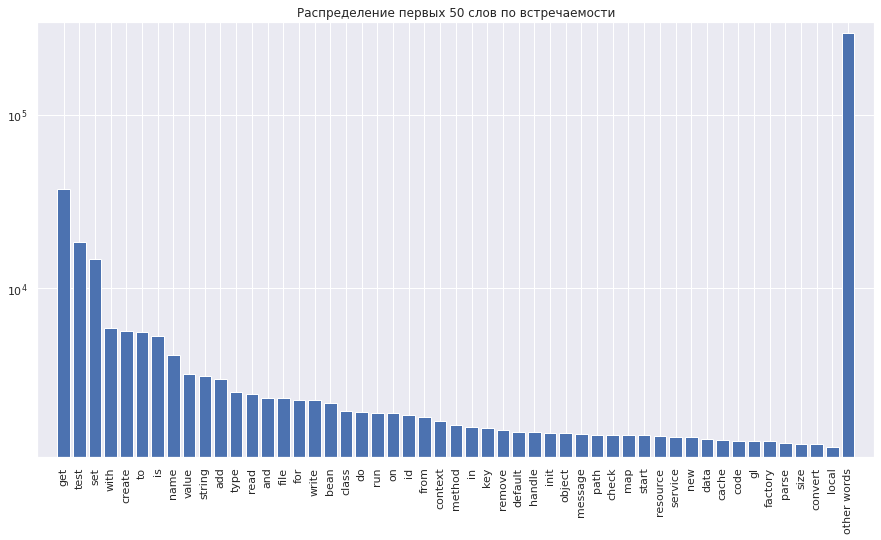

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.figure(figsize=(15, 8))
plt.title(f"Распределение первых {LIMIT_WORDS} слов по встречаемости")
plt.yscale("log")
plt.xticks(rotation='vertical')
plt.margins(0.025)
plt.bar(srt_labels, srt_freqs)
plt.plot();